In [2]:
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, value, LpStatus, LpMinimize

# UTA 2.1

In [ ]:

import pandas as pd
import numpy as np
df = pd.read_csv("dataset/uta/dataset.csv")

PricePerDay_tab = np.sort(df["PricePerDay"].to_numpy())[::-1]
Deposit_tab = np.sort(df["Deposit"].to_numpy())[::-1]
EnginePower_tab = df["EnginePower"].to_numpy()
EnginePower_tab.sort()
SailArea_tab = df["SailArea"].to_numpy()
SailArea_tab.sort()
Width_tab = df["Width"].to_numpy()
Width_tab.sort()

print(df)



               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

In [ ]:
prob = LpProblem("UTA_Method", LpMinimize)

PricePerDay_vars = {val: LpVariable(f"PricePerDay_{val}", lowBound=0, upBound=1) for val in PricePerDay_tab}
Deposit_vars = {val: LpVariable(f"Deposit_{val}", lowBound=0, upBound=1) for val in Deposit_tab}
EnginePower_vars = {val: LpVariable(f"EnginePower_{val}", lowBound=0, upBound=1) for val in EnginePower_tab}
SailArea_vars = {val: LpVariable(f"SailArea_{val}", lowBound=0, upBound=1) for val in SailArea_tab}
Width_vars = {val: LpVariable(f"Width_{val}", lowBound=0, upBound=1) for val in Width_tab}

# Monotonic constraints

for i in range(len(PricePerDay_tab) - 1):
    prob += PricePerDay_vars[PricePerDay_tab[i]] <= PricePerDay_vars[PricePerDay_tab[i + 1]], f"Monotonicity_PricePerDay_{i}"
for i in range(len(Deposit_tab) - 1):
    prob += Deposit_vars[Deposit_tab[i]] <= Deposit_vars[Deposit_tab[i + 1]], f"Monotonicity_Deposit_{i}"
for i in range(len(EnginePower_tab) - 1):
    prob += EnginePower_vars[EnginePower_tab[i]] <= EnginePower_vars[EnginePower_tab[i + 1]], f"Monotonicity_EnginePower_{i}"
for i in range(len(SailArea_tab) - 1):
    prob += SailArea_vars[SailArea_tab[i]] <= SailArea_vars[SailArea_tab[i + 1]], f"Monotonicity_SailArea_{i}"
for i in range(len(Width_tab) - 1):
    prob += Width_vars[Width_tab[i]] <= Width_vars[Width_tab[i + 1]], f"Monotonicity_Width_{i}"

# Normalization constraints
prob += PricePerDay_vars[PricePerDay_tab[0]] == 0, "Normalize_PricePerDay_Lowest"
prob += Deposit_vars[Deposit_tab[0]] == 0, "Normalize_Deposit_Lowest"
prob += EnginePower_vars[EnginePower_tab[0]] == 0, "Normalize_EnginePower_Lowest"
prob += SailArea_vars[SailArea_tab[0]] == 0, "Normalize_SailArea_Lowest"
prob += Width_vars[Width_tab[0]] == 0, "Normalize_Width_Lowest"
prob += PricePerDay_vars[PricePerDay_tab[-1]] + Deposit_vars[Deposit_tab[-1]] + EnginePower_vars[EnginePower_tab[-1]] + SailArea_vars[SailArea_tab[-1]] + Width_vars[Width_tab[-1]] == 1, "Normalize_Sum_One"

prob += PricePerDay_vars[PricePerDay_tab[-1]] <= 0.5, "Normalize_PricePerDay_Highest"
prob += Deposit_vars[Deposit_tab[-1]] <= 0.5, "Normalize_Deposit_Highest"
prob += EnginePower_vars[EnginePower_tab[-1]] <= 0.5, "Normalize_EnginePower_Highest"
prob += SailArea_vars[SailArea_tab[-1]] <= 0.5, "Normalize_SailArea_Highest"
prob += Width_vars[Width_tab[-1]] <= 0.5, "Normalize_Width_Highest"


# additional constraints
prob += Deposit_vars[Deposit_tab[-1]] >= 0.1, "Normalize_Deposit_Highest_1"
prob += PricePerDay_vars[PricePerDay_tab[-1]] >= 0.3, "Normalize_PricePerDay_Highest_2"
prob += EnginePower_vars[EnginePower_tab[-1]] >= 0.2, "Normalize_EnginePower_Highest_3"
prob += SailArea_vars[SailArea_tab[-1]] >= 0.2, "Normalize_SailArea_Highest_4"
prob += Width_vars[Width_tab[-1]] >= 0.2, "Normalize_Width_Highest_5"

alternatives = df.iloc[:]
alternative_utilities = {}

for index, row in alternatives.iterrows():
    name = row["Name"]
    
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var

    
    prob += utility_var == lpSum([
        PricePerDay_vars[row["PricePerDay"]],
        Deposit_vars[row["Deposit"]],
        EnginePower_vars[row["EnginePower"]],
        SailArea_vars[row["SailArea"]],
        Width_vars[row["Width"]]
    ]), f"Utility_{name}"


print(alternatives)


               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

In [5]:
v1 = LpVariable("v_Laguna 25_Antila 24.4", lowBound=0, cat="Binary")
v2 = LpVariable("v_Antila 24.4_Maxus 24 Evo", lowBound=0, cat="Binary")
v3 = LpVariable("v_Maxus 24 Evo_Mariner 24", lowBound=0, cat="Binary")
v4 = LpVariable("v_Mariner 24_Antila 24.4", lowBound=0, cat="Binary")
v5 = LpVariable("v_Phobos 24.5 #2_Phobos 25 #2", lowBound=0, cat="Binary")

In [ ]:
#Preference constraints provided by the decision maker
epsilon = 0.01


prob += alternative_utilities["Laguna 25"] >= alternative_utilities["Antila 24.4"] + epsilon - v1, "Pref_1"
prob += alternative_utilities["Antila 24.4"] >= alternative_utilities["Maxus 24 Evo"] + epsilon - v2, "Pref_2"
prob += alternative_utilities["Maxus 24 Evo"] >= alternative_utilities["Mariner 24"] + epsilon - v3, "Pref_3"
prob += alternative_utilities["Mariner 24"] >= alternative_utilities["Laguna 25"] + epsilon -v4, "Pref_4"
prob += alternative_utilities["Phobos 24.5 #2"] >= alternative_utilities["Maxus 24 Evo #2"] + epsilon -v5, "Pref_5"


In [7]:
prob += v1 + v2 + v3 + v4 + v5

In [ ]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/wojtek/Documents/uczelnia/decision_analysis/yachts-MCDM/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/1053f339d04a4da9af95c0bb44d5e205-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/1053f339d04a4da9af95c0bb44d5e205-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 117 COLUMNS
At line 372 RHS
At line 485 BOUNDS
At line 529 ENDATA
Problem MODEL has 112 rows, 59 columns and 197 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0.04 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0004I processed model has 15 rows, 20 columns (5 integer (5 of which binary)) and 56 elements
Cbc0038I Initial state - 3 integers unsatisfied sum - 0.0493823
Cbc0038I Pass   1: suminf.    0.04938 (3) obj. 0.0493823

1

In [9]:
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))

Status: Optimal

Optimal Solution:
Antila_24.4_#2_Utility = 0.3
Antila_24.4_Utility = 0.3
Antila_24_Utility = 0.3
Antila_28.8_Utility = 0.0
Aquatic_25T_Utility = 0.4
Deposit_1000 = 0.1
Deposit_1400 = 0.1
Deposit_1500 = 0.0
Deposit_1700 = 0.0
Deposit_2000 = 0.0
Deposit_3000 = 0.0
EnginePower_10 = 0.0
EnginePower_12 = 0.2
EnginePower_4 = 0.0
EnginePower_5 = 0.0
EnginePower_6 = 0.0
EnginePower_8 = 0.0
Janmor_25_Utility = 0.3
Laguna_25_Utility = 0.4
Mariner_24_Utility = 0.3
Maxus_24_Evo_#2_Utility = 0.3
Maxus_24_Evo_Utility = 0.29
Maxus_24_Utility = 0.4
Phobos_24.5_#2_Utility = 0.89
Phobos_24.5_Utility = 0.0
Phobos_25_#2_Utility = 0.0
Phobos_25_Utility = 0.3
PricePerDay_190 = 0.3
PricePerDay_220 = 0.3
PricePerDay_240 = 0.3
PricePerDay_250 = 0.3
PricePerDay_260 = 0.3
PricePerDay_290 = 0.3
PricePerDay_300 = 0.3
PricePerDay_360 = 0.29
PricePerDay_390 = 0.0
PricePerDay_400 = 0.0
PricePerDay_580 = 0.0
SailArea_26 = 0.0
SailArea_27 = 0.0
SailArea_29 = 0.0
SailArea_30 = 0.0
SailArea_31 = 0.0
Sail

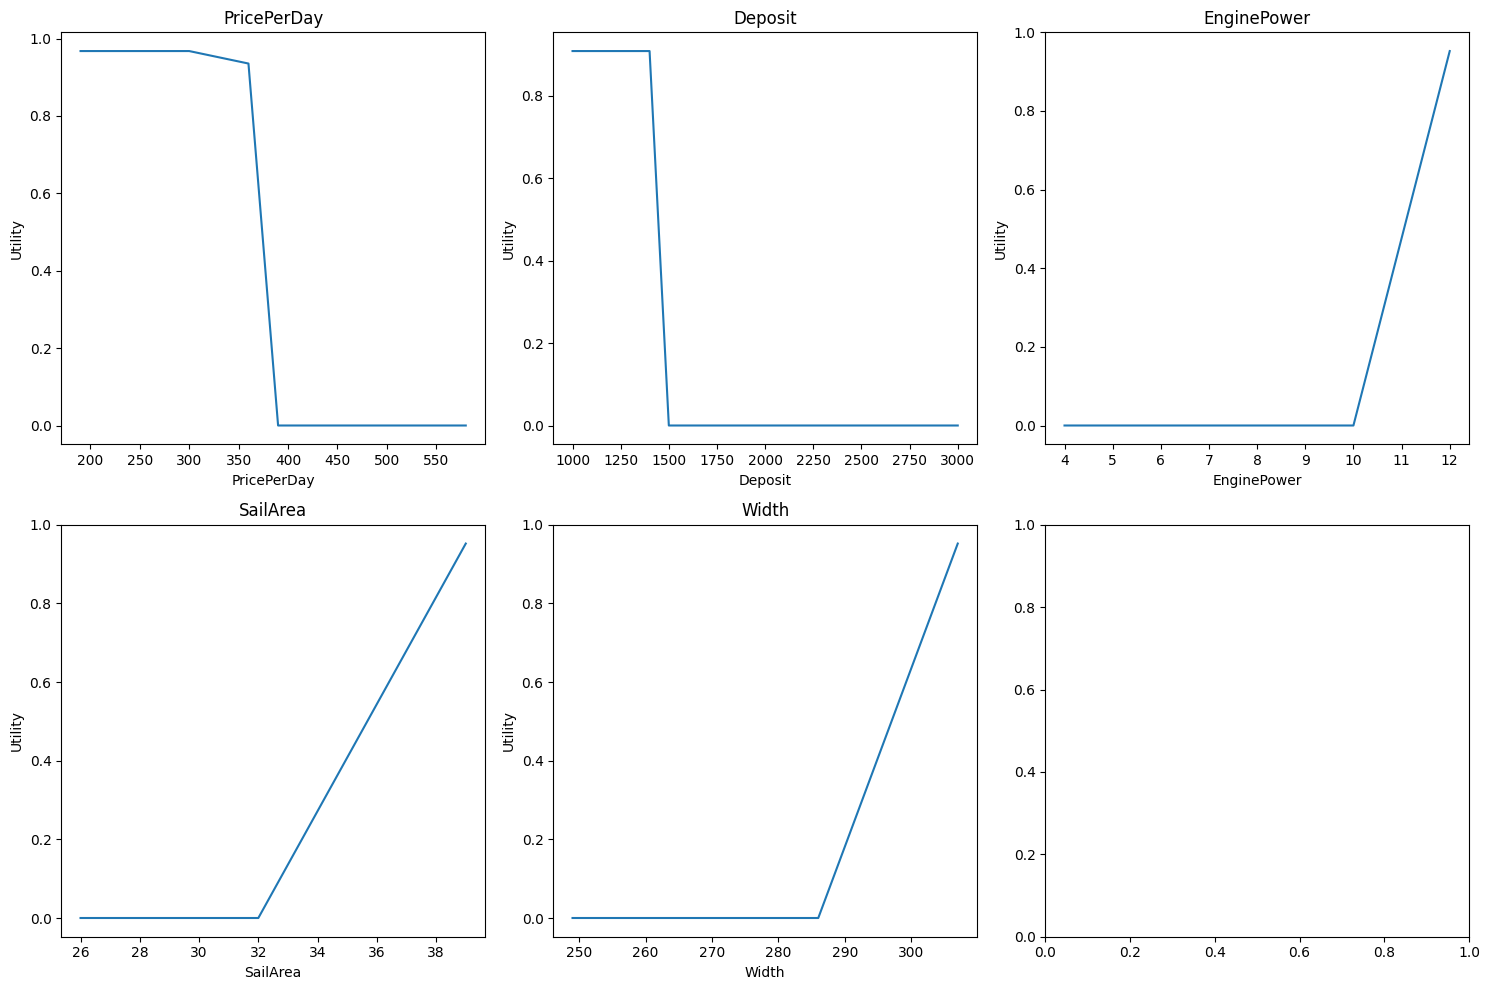

In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
temp = [value(PricePerDay_vars[val]) for val in PricePerDay_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[0].plot(PricePerDay_tab, temp)
axs[0].set_title("PricePerDay")
axs[0].set_xlabel("PricePerDay")
axs[0].set_ylabel("Utility")
temp = [value(Deposit_vars[val]) for val in Deposit_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[1].plot(Deposit_tab, temp)
axs[1].set_title("Deposit")
axs[1].set_xlabel("Deposit")
axs[1].set_ylabel("Utility")
temp = [value(EnginePower_vars[val]) for val in EnginePower_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[2].plot(EnginePower_tab, temp)
axs[2].set_title("EnginePower")
axs[2].set_xlabel("EnginePower")
axs[2].set_ylabel("Utility")
temp = [value(SailArea_vars[val]) for val in SailArea_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[3].plot(SailArea_tab, temp)
axs[3].set_title("SailArea")
axs[3].set_xlabel("SailArea")
axs[3].set_ylabel("Utility")
temp = [value(Width_vars[val]) for val in Width_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[4].plot(Width_tab, temp)
axs[4].set_title("Width")
axs[4].set_xlabel("Width") 
axs[4].set_ylabel("Utility")

plt.tight_layout()
plt.show()

In [ ]:
prob = LpProblem("UTA_Method", LpMinimize)

PricePerDay_vars = {val: LpVariable(f"PricePerDay_{val}", lowBound=0, upBound=1) for val in PricePerDay_tab}
Deposit_vars = {val: LpVariable(f"Deposit_{val}", lowBound=0, upBound=1) for val in Deposit_tab}
EnginePower_vars = {val: LpVariable(f"EnginePower_{val}", lowBound=0, upBound=1) for val in EnginePower_tab}
SailArea_vars = {val: LpVariable(f"SailArea_{val}", lowBound=0, upBound=1) for val in SailArea_tab}
Width_vars = {val: LpVariable(f"Width_{val}", lowBound=0, upBound=1) for val in Width_tab}

# Monotonic constraints

for i in range(len(PricePerDay_tab) - 1):
    prob += PricePerDay_vars[PricePerDay_tab[i]] <= PricePerDay_vars[PricePerDay_tab[i + 1]], f"Monotonicity_PricePerDay_{i}"
for i in range(len(Deposit_tab) - 1):
    prob += Deposit_vars[Deposit_tab[i]] <= Deposit_vars[Deposit_tab[i + 1]], f"Monotonicity_Deposit_{i}"
for i in range(len(EnginePower_tab) - 1):
    prob += EnginePower_vars[EnginePower_tab[i]] <= EnginePower_vars[EnginePower_tab[i + 1]], f"Monotonicity_EnginePower_{i}"
for i in range(len(SailArea_tab) - 1):
    prob += SailArea_vars[SailArea_tab[i]] <= SailArea_vars[SailArea_tab[i + 1]], f"Monotonicity_SailArea_{i}"
for i in range(len(Width_tab) - 1):
    prob += Width_vars[Width_tab[i]] <= Width_vars[Width_tab[i + 1]], f"Monotonicity_Width_{i}"

# Normalization constraints
prob += PricePerDay_vars[PricePerDay_tab[0]] == 0, "Normalize_PricePerDay_Lowest"
prob += Deposit_vars[Deposit_tab[0]] == 0, "Normalize_Deposit_Lowest"
prob += EnginePower_vars[EnginePower_tab[0]] == 0, "Normalize_EnginePower_Lowest"
prob += SailArea_vars[SailArea_tab[0]] == 0, "Normalize_SailArea_Lowest"
prob += Width_vars[Width_tab[0]] == 0, "Normalize_Width_Lowest"
prob += PricePerDay_vars[PricePerDay_tab[-1]] + Deposit_vars[Deposit_tab[-1]] + EnginePower_vars[EnginePower_tab[-1]] + SailArea_vars[SailArea_tab[-1]] + Width_vars[Width_tab[-1]] == 1, "Normalize_Sum_One"

prob += PricePerDay_vars[PricePerDay_tab[-1]] <= 0.5, "Normalize_PricePerDay_Highest"
prob += Deposit_vars[Deposit_tab[-1]] <= 0.5, "Normalize_Deposit_Highest"
prob += EnginePower_vars[EnginePower_tab[-1]] <= 0.5, "Normalize_EnginePower_Highest"
prob += SailArea_vars[SailArea_tab[-1]] <= 0.5, "Normalize_SailArea_Highest"
prob += Width_vars[Width_tab[-1]] <= 0.5, "Normalize_Width_Highest"


# additional constraints
prob += Deposit_vars[Deposit_tab[-1]] >= 0.2, "Normalize_Deposit_Highest_1"
prob += PricePerDay_vars[PricePerDay_tab[-1]] >= 0.2, "Normalize_PricePerDay_Highest_2"
prob += EnginePower_vars[EnginePower_tab[-1]] >= 0.2, "Normalize_EnginePower_Highest_3"
prob += SailArea_vars[SailArea_tab[-1]] >= 0.2, "Normalize_SailArea_Highest_4"
prob += Width_vars[Width_tab[-1]] >= 0.2, "Normalize_Width_Highest_5"

alternatives = df.iloc[:]
alternative_utilities = {}

for index, row in alternatives.iterrows():
    name = row["Name"]
    
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var

    
    prob += utility_var == lpSum([
        PricePerDay_vars[row["PricePerDay"]],
        Deposit_vars[row["Deposit"]],
        EnginePower_vars[row["EnginePower"]],
        SailArea_vars[row["SailArea"]],
        Width_vars[row["Width"]]
    ]), f"Utility_{name}"



print(alternatives)


               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

In [19]:
v1 = LpVariable("v_Laguna 25_Antila 24.4", lowBound=0, cat="Binary")
v2 = LpVariable("v_Antila 24.4_Maxus 24 Evo", lowBound=0, cat="Binary")
v3 = LpVariable("v_Maxus 24 Evo_Mariner 24", lowBound=0, cat="Binary")
v4 = LpVariable("v_Mariner 24_Antila 24.4", lowBound=0, cat="Binary")
v5 = LpVariable("v_Phobos 24.5 #3_Phobos 24.5 #2", lowBound=0, cat="Binary")

In [ ]:
#Preference constraints provided by the decision maker
epsilon = 0.01


prob += alternative_utilities["Laguna 25"] >= alternative_utilities["Antila 24.4"] + epsilon, "Pref_1"
prob += alternative_utilities["Antila 24.4"] >= alternative_utilities["Maxus 24 Evo"] + epsilon, "Pref_2"
# prob += alternative_utilities["Maxus 24 Evo"] >= alternative_utilities["Mariner 24"] + epsilon, "Pref_3"
# prob += alternative_utilities["Mariner 24"] >= alternative_utilities["Laguna 25"] + epsilon -v4, "Pref_4"
prob += alternative_utilities["Phobos 25 #2"] >= alternative_utilities["Phobos 24.5 #2"] + epsilon, "Pref_5"


In [21]:
prob += v1 + v2 + v3 + v4 + v5

In [22]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/wojtek/Documents/uczelnia/decision_analysis/yachts-MCDM/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/c2986f31e77b49b89c853536f2290f23-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/c2986f31e77b49b89c853536f2290f23-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 115 COLUMNS
At line 361 RHS
At line 472 BOUNDS
At line 516 ENDATA
Problem MODEL has 110 rows, 59 columns and 188 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0004I processed model has 3 rows, 3 columns (0 integer (0 of which binary)) and 6 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 0 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts

1

In [23]:
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))

Status: Optimal

Optimal Solution:
Antila_24.4_#2_Utility = 1.0
Antila_24.4_Utility = 0.2
Antila_24_Utility = 0.8
Antila_28.8_Utility = 0.6
Aquatic_25T_Utility = 0.2
Deposit_1000 = 0.2
Deposit_1400 = 0.2
Deposit_1500 = 0.2
Deposit_1700 = 0.0
Deposit_2000 = 0.0
Deposit_3000 = 0.0
EnginePower_10 = 0.2
EnginePower_12 = 0.2
EnginePower_4 = 0.0
EnginePower_5 = 0.2
EnginePower_6 = 0.2
EnginePower_8 = 0.2
Janmor_25_Utility = 0.6
Laguna_25_Utility = 1.0
Mariner_24_Utility = 0.4
Maxus_24_Evo_#2_Utility = 0.8
Maxus_24_Evo_Utility = 0.0
Maxus_24_Utility = 0.8
Phobos_24.5_#2_Utility = 0.6
Phobos_24.5_Utility = 0.8
Phobos_25_#2_Utility = 0.8
Phobos_25_Utility = 0.6
PricePerDay_190 = 0.2
PricePerDay_220 = 0.2
PricePerDay_240 = 0.2
PricePerDay_250 = 0.0
PricePerDay_260 = 0.0
PricePerDay_290 = 0.0
PricePerDay_300 = 0.0
PricePerDay_360 = 0.0
PricePerDay_390 = 0.0
PricePerDay_400 = 0.0
PricePerDay_580 = 0.0
SailArea_26 = 0.0
SailArea_27 = 0.0
SailArea_29 = 0.0
SailArea_30 = 0.2
SailArea_31 = 0.2
SailAre

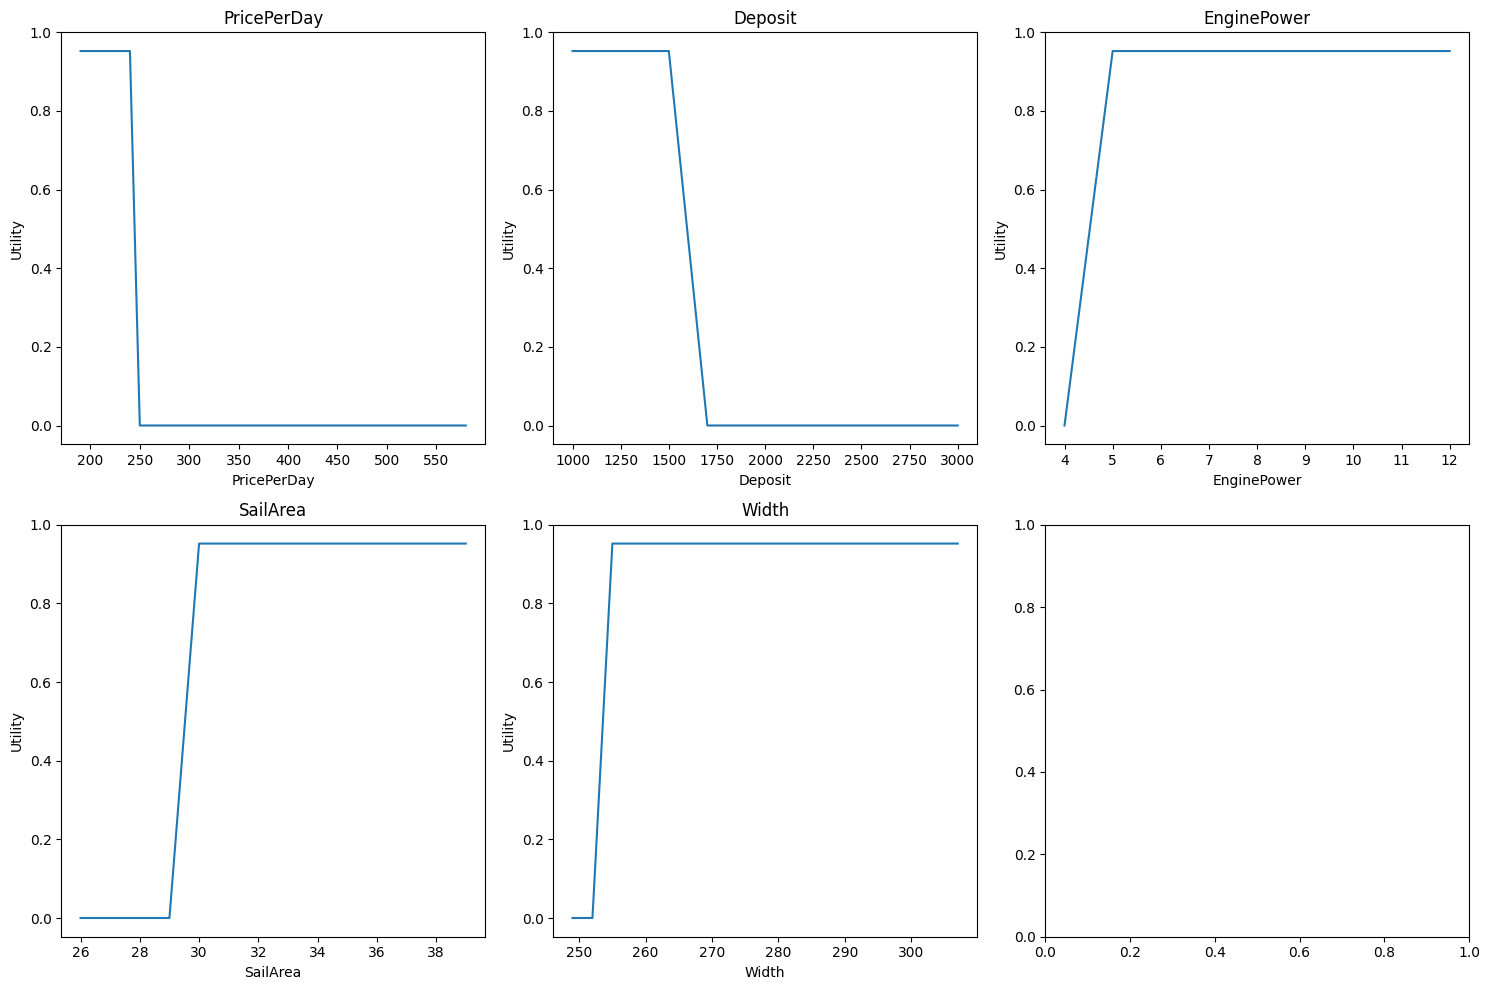

In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
temp = [value(PricePerDay_vars[val]) for val in PricePerDay_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[0].plot(PricePerDay_tab, temp)
axs[0].set_title("PricePerDay")
axs[0].set_xlabel("PricePerDay")
axs[0].set_ylabel("Utility")
temp = [value(Deposit_vars[val]) for val in Deposit_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[1].plot(Deposit_tab, temp)
axs[1].set_title("Deposit")
axs[1].set_xlabel("Deposit")
axs[1].set_ylabel("Utility")
temp = [value(EnginePower_vars[val]) for val in EnginePower_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[2].plot(EnginePower_tab, temp)
axs[2].set_title("EnginePower")
axs[2].set_xlabel("EnginePower")
axs[2].set_ylabel("Utility")
temp = [value(SailArea_vars[val]) for val in SailArea_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[3].plot(SailArea_tab, temp)
axs[3].set_title("SailArea")
axs[3].set_xlabel("SailArea")
axs[3].set_ylabel("Utility")
temp = [value(Width_vars[val]) for val in Width_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[4].plot(Width_tab, temp)
axs[4].set_title("Width")
axs[4].set_xlabel("Width") 
axs[4].set_ylabel("Utility")

plt.tight_layout()
plt.show()


# UTA 2.2

In [ ]:
prob = LpProblem("UTA_Method", LpMaximize)

PricePerDay_vars = {val: LpVariable(f"PricePerDay_{val}", lowBound=0, upBound=1) for val in PricePerDay_tab}
Deposit_vars = {val: LpVariable(f"Deposit_{val}", lowBound=0, upBound=1) for val in Deposit_tab}
EnginePower_vars = {val: LpVariable(f"EnginePower_{val}", lowBound=0, upBound=1) for val in EnginePower_tab}
SailArea_vars = {val: LpVariable(f"SailArea_{val}", lowBound=0, upBound=1) for val in SailArea_tab}
Width_vars = {val: LpVariable(f"Width_{val}", lowBound=0, upBound=1) for val in Width_tab}

# Monotonic constraints

for i in range(len(PricePerDay_tab) - 1):
    prob += PricePerDay_vars[PricePerDay_tab[i]] <= PricePerDay_vars[PricePerDay_tab[i + 1]], f"Monotonicity_PricePerDay_{i}"
for i in range(len(Deposit_tab) - 1):
    prob += Deposit_vars[Deposit_tab[i]] <= Deposit_vars[Deposit_tab[i + 1]], f"Monotonicity_Deposit_{i}"
for i in range(len(EnginePower_tab) - 1):
    prob += EnginePower_vars[EnginePower_tab[i]] <= EnginePower_vars[EnginePower_tab[i + 1]], f"Monotonicity_EnginePower_{i}"
for i in range(len(SailArea_tab) - 1):
    prob += SailArea_vars[SailArea_tab[i]] <= SailArea_vars[SailArea_tab[i + 1]], f"Monotonicity_SailArea_{i}"
for i in range(len(Width_tab) - 1):
    prob += Width_vars[Width_tab[i]] <= Width_vars[Width_tab[i + 1]], f"Monotonicity_Width_{i}"

# Normalization constraints
prob += PricePerDay_vars[PricePerDay_tab[0]] == 0, "Normalize_PricePerDay_Lowest"
prob += Deposit_vars[Deposit_tab[0]] == 0, "Normalize_Deposit_Lowest"
prob += EnginePower_vars[EnginePower_tab[0]] == 0, "Normalize_EnginePower_Lowest"
prob += SailArea_vars[SailArea_tab[0]] == 0, "Normalize_SailArea_Lowest"
prob += Width_vars[Width_tab[0]] == 0, "Normalize_Width_Lowest"
prob += PricePerDay_vars[PricePerDay_tab[-1]] + Deposit_vars[Deposit_tab[-1]] + EnginePower_vars[EnginePower_tab[-1]] + SailArea_vars[SailArea_tab[-1]] + Width_vars[Width_tab[-1]] == 1, "Normalize_Sum_One"

prob += PricePerDay_vars[PricePerDay_tab[-1]] <= 0.5, "Normalize_PricePerDay_Highest"
prob += Deposit_vars[Deposit_tab[-1]] <= 0.5, "Normalize_Deposit_Highest"
prob += EnginePower_vars[EnginePower_tab[-1]] <= 0.5, "Normalize_EnginePower_Highest"
prob += SailArea_vars[SailArea_tab[-1]] <= 0.5, "Normalize_SailArea_Highest"
prob += Width_vars[Width_tab[-1]] <= 0.5, "Normalize_Width_Highest"


# additional constraints
prob += Deposit_vars[Deposit_tab[-1]] >= 0.2, "Normalize_Deposit_Highest_1"
prob += PricePerDay_vars[PricePerDay_tab[-1]] >= 0.2, "Normalize_PricePerDay_Highest_2"
prob += EnginePower_vars[EnginePower_tab[-1]] >= 0.2, "Normalize_EnginePower_Highest_3"
prob += SailArea_vars[SailArea_tab[-1]] >= 0.2, "Normalize_SailArea_Highest_4"
prob += Width_vars[Width_tab[-1]] >= 0.2, "Normalize_Width_Highest_5"

alternatives = df.iloc[:]
alternative_utilities = {}

for index, row in alternatives.iterrows():
    name = row["Name"]
    
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var


    prob += utility_var == lpSum([
        PricePerDay_vars[row["PricePerDay"]],
        Deposit_vars[row["Deposit"]],
        EnginePower_vars[row["EnginePower"]],
        SailArea_vars[row["SailArea"]],
        Width_vars[row["Width"]]
    ]), f"Utility_{name}"




print(alternatives)

               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

In [ ]:
eps_1 = LpVariable("eps_1", lowBound=0)
eps_2 = LpVariable("eps_2", lowBound=0)
# eps_3 = LpVariable("eps_3", lowBound=0)
# eps_4 = LpVariable("eps_4", lowBound=0)
eps_5 = LpVariable("eps_5", lowBound=0)


prob += alternative_utilities["Laguna 25"] >= alternative_utilities["Antila 24.4"] + eps_1, "Pref_1"
prob += alternative_utilities["Antila 24.4"] >= alternative_utilities["Maxus 24 Evo"] + eps_2, "Pref_2"
# prob += alternative_utilities["Maxus 24 Evo"] >= alternative_utilities["Mariner 24"] + eps_3, "Pref_3"
# prob += alternative_utilities["Mariner 24"] >= alternative_utilities["Laguna 25"] + eps_4, "Pref_4"
prob += alternative_utilities["Phobos 25 #2"] >= alternative_utilities["Phobos 24.5 #2"] + eps_5, "Pref_5"


In [38]:
# objefctive function
prob += lpSum([eps_1, eps_2, eps_5])

In [39]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/wojtek/Documents/uczelnia/decision_analysis/yachts-MCDM/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/ec918b32dde849bfa0a84740b6d177bf-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/ec918b32dde849bfa0a84740b6d177bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 115 COLUMNS
At line 352 RHS
At line 463 BOUNDS
At line 502 ENDATA
Problem MODEL has 110 rows, 57 columns and 191 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-108) rows, 4 (-53) columns and 6 (-185) elements
0  Obj 0 Dual inf 2.999997 (3)
3  Obj 1.2
Optimal - objective value 1.2
After Postsolve, objective 1.2, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1.2 - 3 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time 

1

In [40]:
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))

Status: Optimal

Optimal Solution:
Antila_24.4_#2_Utility = 1.0
Antila_24.4_Utility = 0.4
Antila_24_Utility = 0.8
Antila_28.8_Utility = 0.6
Aquatic_25T_Utility = 0.4
Deposit_1000 = 0.2
Deposit_1400 = 0.2
Deposit_1500 = 0.2
Deposit_1700 = 0.0
Deposit_2000 = 0.0
Deposit_3000 = 0.0
EnginePower_10 = 0.2
EnginePower_12 = 0.2
EnginePower_4 = 0.0
EnginePower_5 = 0.2
EnginePower_6 = 0.2
EnginePower_8 = 0.2
Janmor_25_Utility = 0.8
Laguna_25_Utility = 1.0
Mariner_24_Utility = 0.6
Maxus_24_Evo_#2_Utility = 0.8
Maxus_24_Evo_Utility = 0.0
Maxus_24_Utility = 1.0
Phobos_24.5_#2_Utility = 0.6
Phobos_24.5_Utility = 0.8
Phobos_25_#2_Utility = 0.8
Phobos_25_Utility = 0.6
PricePerDay_190 = 0.2
PricePerDay_220 = 0.2
PricePerDay_240 = 0.2
PricePerDay_250 = 0.2
PricePerDay_260 = 0.2
PricePerDay_290 = 0.2
PricePerDay_300 = 0.0
PricePerDay_360 = 0.0
PricePerDay_390 = -0.0
PricePerDay_400 = 0.0
PricePerDay_580 = 0.0
SailArea_26 = 0.0
SailArea_27 = 0.0
SailArea_29 = 0.0
SailArea_30 = 0.2
SailArea_31 = 0.2
SailAr

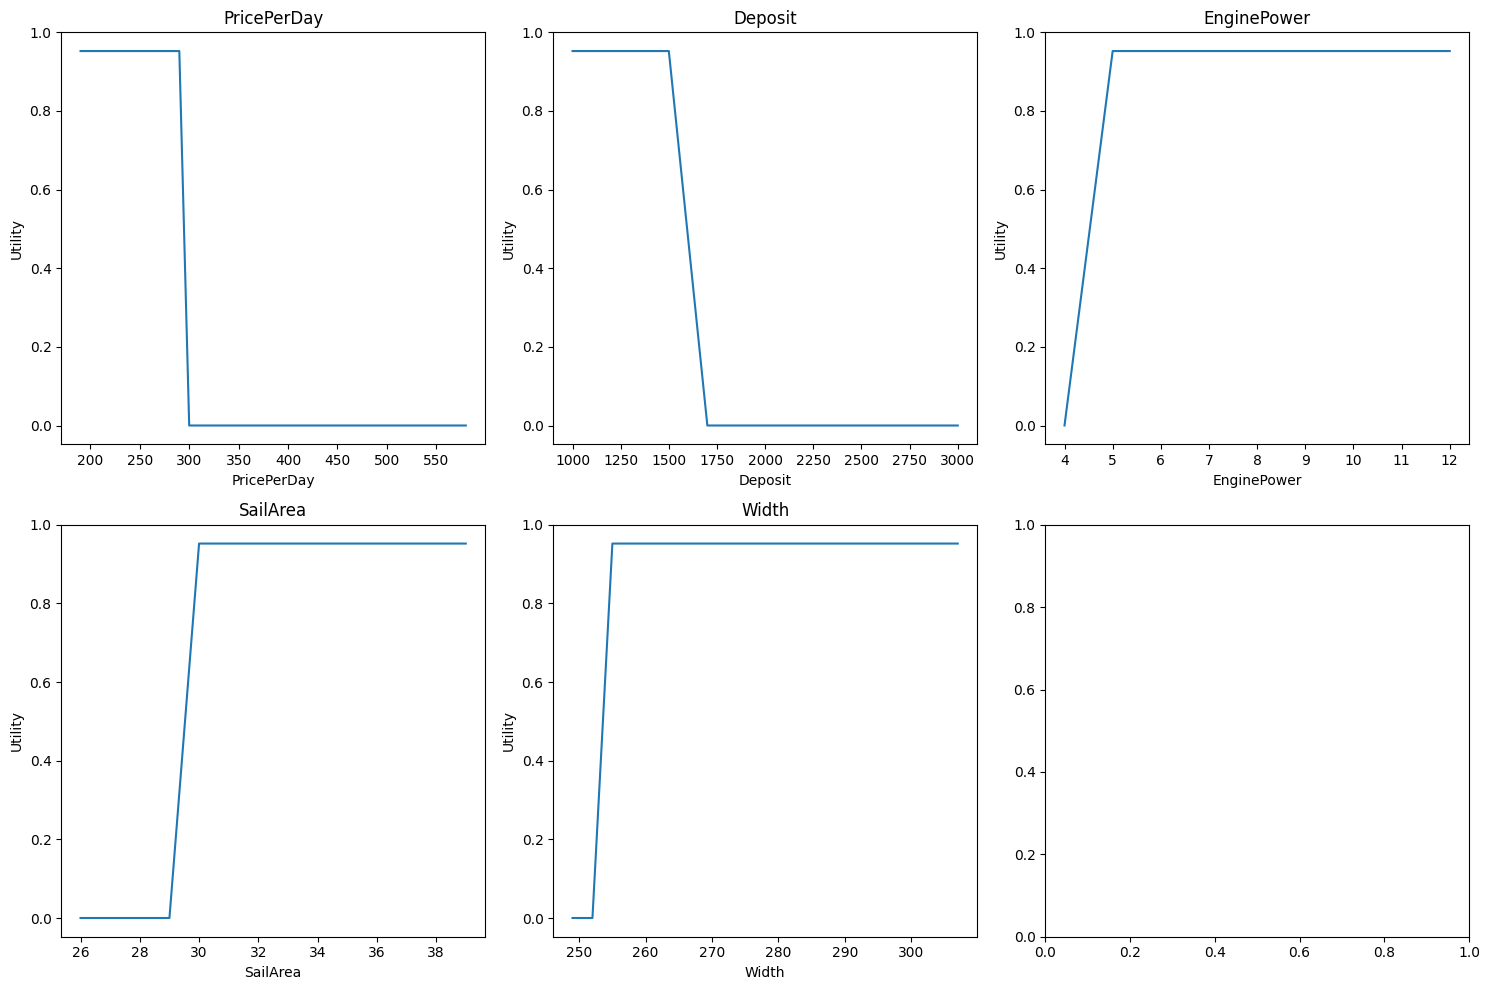

In [41]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
temp = [value(PricePerDay_vars[val]) for val in PricePerDay_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[0].plot(PricePerDay_tab, temp)
axs[0].set_title("PricePerDay")
axs[0].set_xlabel("PricePerDay")
axs[0].set_ylabel("Utility")
temp = [value(Deposit_vars[val]) for val in Deposit_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[1].plot(Deposit_tab, temp)
axs[1].set_title("Deposit")
axs[1].set_xlabel("Deposit")
axs[1].set_ylabel("Utility")
temp = [value(EnginePower_vars[val]) for val in EnginePower_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[2].plot(EnginePower_tab, temp)
axs[2].set_title("EnginePower")
axs[2].set_xlabel("EnginePower")
axs[2].set_ylabel("Utility")
temp = [value(SailArea_vars[val]) for val in SailArea_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[3].plot(SailArea_tab, temp)
axs[3].set_title("SailArea")
axs[3].set_xlabel("SailArea")
axs[3].set_ylabel("Utility")
temp = [value(Width_vars[val]) for val in Width_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[4].plot(Width_tab, temp)
axs[4].set_title("Width")
axs[4].set_xlabel("Width") 
axs[4].set_ylabel("Utility")

plt.tight_layout()
plt.show()
